In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm import tqdm

In [3]:
train = pd.read_csv('data/ODIR-5K_Training_Annotations(Updated)_V2.csv')

In [4]:
train.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [5]:
test = pd.read_csv('data/XYZ_ODIR.csv')

In [6]:
test.head()

,ID,N,D,G,C,A,H,M,O
0,937,0,0,0,0,0,0,0,0
1,967,0,0,0,0,0,0,0,0
2,988,0,0,0,0,0,0,0,0
3,995,0,0,0,0,0,0,0,0
4,1000,0,0,0,0,0,0,0,0


In [7]:
corr = train.apply(lambda x: x['Left-Diagnostic Keywords'] == x['Right-Diagnostic Keywords'], axis=1)

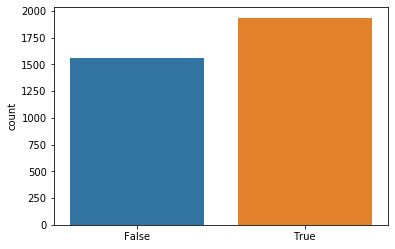

In [8]:
sns.countplot(corr)

In [9]:
summ = train.apply(lambda x: x['N'] + x['D'] + x['G'] + x['C'] + x['A'] + x['H'] + x['M'] + x['O'], axis=1)
summ.value_counts()

1    2914
2     557
3      29
dtype: int64

In [10]:
ind = []
for i in range(len(summ)):
    if summ[i] == 3:
        ind.append(i)

In [11]:
train.iloc[ind]

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
188,188,55,Female,188_left.jpg,188_right.jpg,laser spot，severe proliferative diabetic retin...,cataract,0,1,0,1,0,0,0,1
304,305,55,Male,305_left.jpg,305_right.jpg,"hypertensive retinopathy,diabetic retinopathy",hypertensive retinopathy，macular epiretinal me...,0,1,0,0,0,1,0,1
624,625,72,Female,625_left.jpg,625_right.jpg,cataract，suspected glaucoma,cataract，branch retinal vein occlusion,0,0,1,1,0,0,0,1
935,938,76,Male,938_left.jpg,938_right.jpg,dry age-related macular degeneration，myopia re...,diabetic retinopathy，dry age-related macular d...,0,1,0,0,1,0,1,0
1007,1020,67,Male,1020_left.jpg,1020_right.jpg,glaucoma，intraretinal hemorrhage,myopia retinopathy,0,0,1,0,0,0,1,1
1186,1263,62,Male,1263_left.jpg,1263_right.jpg,old central retinal vein occlusion,glaucoma，hypertensive retinopathy,0,0,1,0,0,1,0,1
1219,1303,49,Male,1303_left.jpg,1303_right.jpg,glaucoma，central retinal vein occlusion,hypertensive retinopathy,0,0,1,0,0,1,0,1
1265,1410,69,Female,1410_left.jpg,1410_right.jpg,suspected glaucoma，refractive media opacity,mild nonproliferative retinopathy,0,1,1,0,0,0,0,1
1293,1442,63,Male,1442_left.jpg,1442_right.jpg,glaucoma，mild nonproliferative retinopathy，mac...,pigmentation disorder,0,1,1,0,0,0,0,1
1313,1474,79,Female,1474_left.jpg,1474_right.jpg,glaucoma，moderate non proliferative retinopathy,drusen,0,1,1,0,0,0,0,1


Чекнем контрольные суммы лейблов

In [12]:
labels = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
for label in labels:
    print(train[label].sum())

1140
1128
215
212
164
103
174
979


In [13]:
left_unique_full = train['Left-Diagnostic Keywords'].unique()
right_unique_full = train['Right-Diagnostic Keywords'].unique()

In [14]:
left_unique = []
right_unique = []
for label in left_unique_full:
    left_unique.extend(label.split('，'))
for label in right_unique_full:
    right_unique.extend(label.split('，'))

In [15]:
left_unique = list(set(left_unique))
right_unique = list(set(right_unique))
unique = []
for label in left_unique:
    unique.extend(label.split(','))
for label in right_unique:
    unique.extend(label.split(','))
unique_diagnosis = list(set(unique))
len(unique_diagnosis)

102

In [16]:
for diagnosis in unique_diagnosis:
    if 'fundus' in diagnosis:
        print(diagnosis)

no fundus image
normal fundus
tessellated fundus
fundus laser photocoagulation spots


In [17]:
for diagnosis in unique_diagnosis:
    if 'macular degeneration' in diagnosis:
        print(diagnosis)

dry age-related macular degeneration
wet age-related macular degeneration
age-related macular degeneration


Хуевый путь матчинга картинок и лейблов был представлен выше, начнем нормально - от лейблов к кейвордам

In [18]:
train['all_keywords'] = train.apply(lambda x: x['Left-Diagnostic Keywords'] + '，' + x['Right-Diagnostic Keywords'], axis=1)

In [19]:
train.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,all_keywords
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,cataract，normal fundus
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,normal fundus，normal fundus
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,laser spot，moderate non proliferative retinopa...
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1,normal fundus，branch retinal artery occlusion
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,macular epiretinal membrane，mild nonproliferat...


In [32]:
normal = []
diabetic = []
glaucoma = []
cataract = []
amd = []
hypertension = []
myopia = []
other = []
for index, row in train.iterrows():
    if row['N'] == 1:
        normal.extend(row['all_keywords'].split('，'))
    if row['D'] == 1:
        diabetic.extend(row['all_keywords'].split('，'))
    if row['G'] == 1:
        glaucoma.extend(row['all_keywords'].split('，'))
    if row['C'] == 1:
        cataract.extend(row['all_keywords'].split('，'))
    if row['A'] == 1:
        amd.extend(row['all_keywords'].split('，'))
    if row['H'] == 1:
        hypertension.extend(row['all_keywords'].split('，'))
    if row['M'] == 1:
        myopia.extend(row['all_keywords'].split('，'))
    if row['O'] == 1:
        other.extend(row['all_keywords'].split('，'))

Начнем по порядку с примеров где оба глаза здоровых

In [33]:
normal = list(set(normal))
print(normal)

['low image quality', 'lens dust', 'normal fundus']


Че? Ща посмотрим

In [34]:
dust = train.apply(lambda x:  'lens dust' in x['all_keywords'], axis=1)

In [35]:
dust.value_counts()

False    3235
True      265
dtype: int64

265 примеров с пылью, круто. Посмотрим, на сколько критично

In [36]:
for i in range(len(dust)):
    if dust[i]:
        print(train.iloc[i])
        break

ID                                                                          20
Patient Age                                                                 64
Patient Sex                                                             Female
Left-Fundus                                                        20_left.jpg
Right-Fundus                                                      20_right.jpg
Left-Diagnostic Keywords                     rhegmatogenous retinal detachment
Right-Diagnostic Keywords                              lens dust，normal fundus
N                                                                            0
D                                                                            0
G                                                                            0
C                                                                            0
A                                                                            0
H                                                   

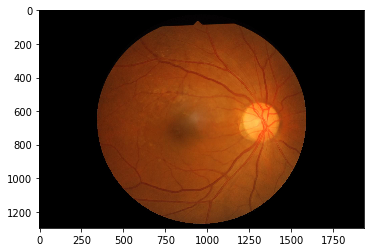

In [37]:
im = cv2.imread('data/ODIR-5K_Training_Images/20_right.jpg')[..., :: -1]
plt.imshow(im)

Хуй знает, вроде норм, пока оставим, тем более их довольно много. Глянем че там по качеству

In [38]:
low = train.apply(lambda x:  'low image quality' in x['all_keywords'], axis=1)

In [39]:
low.value_counts()

False    3481
True       19
dtype: int64

Ну этих хотя бы поменьше

In [40]:
for i in range(len(low)):
    if low[i]:
        print(train.iloc[i])
        break

ID                                                                       372
Patient Age                                                               52
Patient Sex                                                           Female
Left-Fundus                                                     372_left.jpg
Right-Fundus                                                   372_right.jpg
Left-Diagnostic Keywords                       low image quality,maculopathy
Right-Diagnostic Keywords                                  low image quality
N                                                                          0
D                                                                          0
G                                                                          0
C                                                                          0
A                                                                          0
H                                                                          0

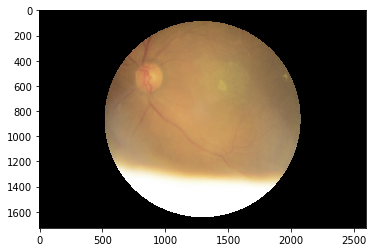

In [41]:
im = cv2.imread('data/ODIR-5K_Training_Images/372_left.jpg')[..., :: -1]
plt.imshow(im)

In [43]:
del normal[:1]
print(normal)

['normal fundus']


В общем какие-то испорченные примеры, выкинем их нахуй видимо. Переходим ко второму пункту - диабетическая ретинопатия

In [44]:
dummy = []
for label in diabetic:
    dummy.extend(label.split(','))
diabetic = list(set(dummy))
for label in diabetic:
    if 'retinopathy' in label:
        print(label)

severe nonproliferative retinopathy
suspected moderate non proliferative retinopathy
suspicious diabetic retinopathy
severe proliferative diabetic retinopathy
moderate non proliferative retinopathy
mild nonproliferative retinopathy
proliferative diabetic retinopathy
suspected diabetic retinopathy
diabetic retinopathy
hypertensive retinopathy
myopia retinopathy


Тут все вроде как относится к диабетической ретинопатии, кроме двух. Чекнем

In [45]:
mr = train.apply(lambda x:  'myopia retinopathy' in x['all_keywords'], axis=1)
for i in range(len(mr)):
    if mr[i]:
        print(train.iloc[i])
        break

ID                                                                         375
Patient Age                                                                 64
Patient Sex                                                               Male
Left-Fundus                                                       375_left.jpg
Right-Fundus                                                     375_right.jpg
Left-Diagnostic Keywords       punctate inner choroidopathy，myopia retinopathy
Right-Diagnostic Keywords      punctate inner choroidopathy，myopia retinopathy
N                                                                            0
D                                                                            0
G                                                                            0
C                                                                            0
A                                                                            0
H                                                   

Да, это относится к миопии

In [46]:
mr = train.apply(lambda x:  'hypertensive retinopathy' in x['all_keywords'], axis=1)
for i in range(len(mr)):
    if mr[i]:
        print(train.iloc[i])
        break

ID                                                                          11
Patient Age                                                                 60
Patient Sex                                                             Female
Left-Fundus                                                        11_left.jpg
Right-Fundus                                                      11_right.jpg
Left-Diagnostic Keywords     moderate non proliferative retinopathy，hyperte...
Right-Diagnostic Keywords    moderate non proliferative retinopathy，hyperte...
N                                                                            0
D                                                                            1
G                                                                            0
C                                                                            0
A                                                                            0
H                                                   

In [47]:
dummy = []
for label in diabetic:
    if 'retinopathy' in label:
        dummy.append(label)
del dummy[0]
del dummy[-2]
diabetic = dummy
print(diabetic)

['suspected moderate non proliferative retinopathy', 'suspicious diabetic retinopathy', 'severe proliferative diabetic retinopathy', 'moderate non proliferative retinopathy', 'mild nonproliferative retinopathy', 'proliferative diabetic retinopathy', 'suspected diabetic retinopathy', 'diabetic retinopathy', 'myopia retinopathy']


А эта хуйня к гипертензии. Значит все норм, идем дальше

In [48]:
dummy = []
for label in glaucoma:
    dummy.extend(label.split(','))
glaucoma = list(set(dummy))

In [49]:
dummy = []
for label in glaucoma:
    if 'glaucoma' in label:
        dummy.append(label)
glaucoma = dummy
print(glaucoma)

['suspected glaucoma', 'glaucoma']


Тут вроде тоже все понятно, идем дальше

In [50]:
dummy = []
for label in cataract:
    dummy.extend(label.split(','))
cataract = list(set(dummy))

In [51]:
dummy = []
for label in cataract:
    if 'cataract' in label:
        dummy.append(label)
cataract = dummy
print(cataract)

['cataract', 'suspected cataract']


Заебок

In [52]:
dummy = []
for label in amd:
    dummy.extend(label.split(','))
amd = list(set(dummy))

In [53]:
dummy = []
for label in amd:
    if 'degeneration' in label:
        dummy.append(label)
amd = dummy
print(amd)

['dry age-related macular degeneration', 'wet age-related macular degeneration', 'age-related macular degeneration']


Четко

In [54]:
dummy = []
for label in hypertension:
    dummy.extend(label.split(','))
hypertension = list(set(dummy))

In [55]:
dummy = []
for label in hypertension:
    if 'hyper' in label:
        dummy.append(label)
hypertension = dummy
print(hypertension)

['hypertensive retinopathy']


Еще одна ретинопатия. Ладно, дальше

In [56]:
dummy = []
for label in myopia:
    dummy.extend(label.split(','))
myopia = list(set(dummy))

In [57]:
dummy = []
for label in myopia:
    if 'my' in label:
        dummy.append(label)
myopia = dummy
print(myopia)

['myopic retinopathy', 'myopic maculopathy', 'pathological myopia', 'myopia retinopathy']


Составим итоговую таблицу. Сначала дропнем хуевые

In [58]:
for i in range(len(low)):
    if low[i]:
        train = train.drop(index=i)

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3481 entries, 0 to 3499
Data columns (total 16 columns):
ID                           3481 non-null int64
Patient Age                  3481 non-null int64
Patient Sex                  3481 non-null object
Left-Fundus                  3481 non-null object
Right-Fundus                 3481 non-null object
Left-Diagnostic Keywords     3481 non-null object
Right-Diagnostic Keywords    3481 non-null object
N                            3481 non-null int64
D                            3481 non-null int64
G                            3481 non-null int64
C                            3481 non-null int64
A                            3481 non-null int64
H                            3481 non-null int64
M                            3481 non-null int64
O                            3481 non-null int64
all_keywords                 3481 non-null object
dtypes: int64(10), object(6)
memory usage: 462.3+ KB


In [94]:
eye_by_eye = pd.DataFrame(columns=['id', 'N', 'D', 'G', 'C', 'A', 'H', 'M', 'O'])

In [95]:
for index, row in tqdm(train.iterrows()):
    new_row = {'id': row['Left-Fundus'], 'N':0, 'D':0, 'G':0, 'C':0, 'A':0, 'H':0, 'M':0, 'O':0}
    kwords = row['Left-Diagnostic Keywords'].split('，')
    dummy = []
    for word in kwords:
        dummy.extend(word.split(','))
    kwords = dummy
    summ = 0
    for word in kwords:
        if word in normal:
            new_row['N'] = 1
            summ += 1
        elif word in diabetic:
            new_row['D'] = 1
            summ += 1
        elif word in glaucoma:
            new_row['G'] = 1
            summ += 1
        elif word in cataract:
            new_row['C'] = 1
            summ += 1
        elif word in amd:
            new_row['A'] = 1
            summ += 1
        elif word in hypertension:
            new_row['H'] = 1
            summ += 1
        elif word in myopia:
            new_row['M'] = 1
            summ += 1
        else:
            if word == 'lens dust':
                continue
            new_row['O'] = 1
            summ += 1
    if summ == 0:
        continue
    eye_by_eye = eye_by_eye.append(new_row, ignore_index=True)

    new_row = {'id': row['Right-Fundus'], 'N':0, 'D':0, 'G':0, 'C':0, 'A':0, 'H':0, 'M':0, 'O':0}
    kwords = row['Right-Diagnostic Keywords'].split('，')
    dummy = []
    for word in kwords:
        dummy.extend(word.split(','))
    kwords = dummy
    summ = 0
    for word in kwords:
        if word in normal:
            new_row['N'] = 1
            summ += 1
        elif word in diabetic:
            new_row['D'] = 1
            summ += 1
        elif word in glaucoma:
            new_row['G'] = 1
            summ += 1
        elif word in cataract:
            new_row['C'] = 1
            summ += 1
        elif word in amd:
            new_row['A'] = 1
            summ += 1
        elif word in hypertension:
            new_row['H'] = 1
            summ += 1
        elif word in myopia:
            new_row['M'] = 1
            summ += 1
        else:
            if word == 'lens dust':
                continue
            new_row['O'] = 1
            summ += 1
    if summ == 0:
        continue
    eye_by_eye = eye_by_eye.append(new_row, ignore_index=True)

3481it [00:15, 219.97it/s]


In [89]:
eye_by_eye.head(31)

,id,N,D,G,C,A,H,M,O
0,0_left.jpg,0,0,0,1,0,0,0,0
1,0_right.jpg,1,0,0,0,0,0,0,0
2,1_left.jpg,1,0,0,0,0,0,0,0
3,1_right.jpg,1,0,0,0,0,0,0,0
4,2_left.jpg,0,1,0,0,0,0,0,1
5,2_right.jpg,0,1,0,0,0,0,0,0
6,3_left.jpg,1,0,0,0,0,0,0,0
7,3_right.jpg,0,0,0,0,0,0,0,1
8,4_left.jpg,0,0,0,0,0,0,0,1
9,4_right.jpg,0,1,0,0,0,0,0,0


In [90]:
labels = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
for label in labels:
    print(eye_by_eye[label].sum())

3097
1640
326
313
280
193
253
1360


In [91]:
summ = eye_by_eye.apply(lambda x: x['N'] + x['D'] + x['G'] + x['C'] + x['A'] + x['H'] + x['M'] + x['O'], axis=1)
summ.value_counts()

1    6466
2     486
3       8
0       2
dtype: int64

In [ ]:
eye_by_eye.to_csv('splited_train.csv', indde)

In [2]:
sub = pd.read_csv('data/XYZ_ODIR.csv')

In [4]:
dummy = [1] * sub.shape[0]

In [5]:
sub['N'] = dummy

In [7]:
sub.to_csv('baseline.csv', index=False)